# 1. Import Library

In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
numpy.random.seed(10)

Using TensorFlow backend.
D:\Users\Birwin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\Birwin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\Birwin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\Birwin\anaconda3\env

# 2.資料準備、預先處理

In [2]:
all_df = pd.read_csv(r"C:\Users\Birwin\Desktop\wagon\uwamp\www\DL_HW05\iris_dataset\iris.csv")

In [3]:
cols=['sepal.length','sepal.width','petal.length' ,'petal.width', 'variety'] 
all_df=all_df[cols] #將all_df[cols]存入all_df

In [4]:
all_df[cols]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
all_df['variety'] = all_df['variety'].map({'Setosa':0, 'Versicolor': 1, 'Virginica': 2}).astype(int) #因為variety是string透過這個方法將它變成數字(int)

In [6]:
X = all_df.values[:,0:4] #特徵部分
Y = all_df.values[:,4] #類別資料部分

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) #對資料進行切割

In [8]:
encoder = LabelEncoder() 
Y_encoded = encoder.fit_transform(Y_train) 
Y_onehot_train = np_utils.to_categorical(Y_encoded) #對Y_train(Label)進行Onehotcode

In [9]:
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y_test) 
Y_onehot_test = np_utils.to_categorical(Y_encoded) #對Y_test(Label)進行Onehotcode

In [10]:
print('total:',len(all_df),
      'train:',len(X_train),
      'test:',len(X_test))

total: 150 train: 100 test: 50


# 3. Create Model 

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [12]:
model = Sequential() #建立線性堆疊模型

In [13]:
#使用model.add方法，加入Dense神經網路層
model.add(Dense(units=5, input_dim=4,#輸入層4個神經元，隱藏層1:5個神經元 
                kernel_initializer='uniform', #使用uniform distribution分佈的亂數，初始化weight與bis
                activation='relu')) #定義激活函數relu

In [14]:
model.add(Dense(units=7, #隱藏層2:7個神經元
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=3, 
                kernel_initializer='uniform',
                activation='softmax'))

# 4. Train model

In [16]:
model.compile(loss='binary_crossentropy', #設定loss function，使用cross_entropy
              optimizer='adam', metrics=['accuracy']) #使用adam的方式來優化，設定評估模型(metric)方式是accuracy

In [17]:
train_history =model.fit(x=X_train, 
                         y=Y_onehot_train, 
                         validation_split=0.2, # 80%作為訓練資料、20%作為驗證資料
                         epochs=20, #執行20次訓練週期
                         batch_size=5,verbose=2) #每一批次5筆資料、verbose=2(顯示訓練過程)

Train on 80 samples, validate on 20 samples
Epoch 1/20
0s - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6368 - val_acc: 0.6667
Epoch 2/20
0s - loss: 0.6362 - acc: 0.6667 - val_loss: 0.6371 - val_acc: 0.6667
Epoch 3/20
0s - loss: 0.6356 - acc: 0.6667 - val_loss: 0.6370 - val_acc: 0.6667
Epoch 4/20
0s - loss: 0.6345 - acc: 0.6667 - val_loss: 0.6363 - val_acc: 0.6667
Epoch 5/20
0s - loss: 0.6323 - acc: 0.6667 - val_loss: 0.6344 - val_acc: 0.6667
Epoch 6/20
0s - loss: 0.6275 - acc: 0.6667 - val_loss: 0.6306 - val_acc: 0.6667
Epoch 7/20
0s - loss: 0.6189 - acc: 0.6667 - val_loss: 0.6243 - val_acc: 0.6667
Epoch 8/20
0s - loss: 0.6071 - acc: 0.6667 - val_loss: 0.6128 - val_acc: 0.6667
Epoch 9/20
0s - loss: 0.5874 - acc: 0.6667 - val_loss: 0.5978 - val_acc: 0.6833
Epoch 10/20
0s - loss: 0.5619 - acc: 0.7250 - val_loss: 0.5778 - val_acc: 0.7333
Epoch 11/20
0s - loss: 0.5333 - acc: 0.7792 - val_loss: 0.5532 - val_acc: 0.7333
Epoch 12/20
0s - loss: 0.5010 - acc: 0.7792 - val_loss: 0.5272 - val_acc: 

# 5. Print Train History(Acc & Loss)

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

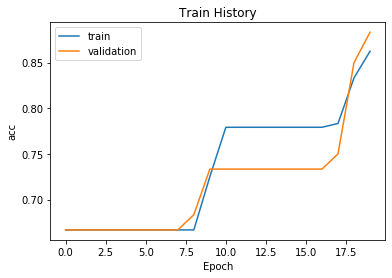

In [19]:
show_train_history(train_history,'acc','val_acc')

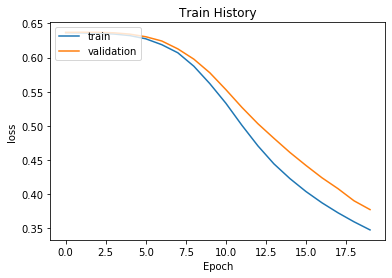

In [20]:
show_train_history(train_history,'loss','val_loss')

# 6.評估模型準確率

In [21]:
scores = model.evaluate(x=X_test, 
                        y=Y_onehot_test)

32/50 [==================>...........] - ETA: 0s

In [22]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3105976903438568
Test accuracy: 0.8866666984558106


# 7.進行預測(predict)

In [23]:
all_probability=model.predict_classes(X_test)

32/50 [==================>...........] - ETA: 0s

In [24]:
all_probability[:10]

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int64)

# 8.混淆矩陣(Confusion matrix)

In [25]:
pd.crosstab(Y_test,all_probability,
           rownames=['label'],colnames=['predict'])

predict,0,2
label,,
0.0,19,0
1.0,0,15
2.0,0,16
